construire un arbre hierarchique

event avec un carre plus heavy autour de la semaine

In [13]:
import numpy as np


basic_colors = {
    'red': (237, 28, 36),
    'pink': (255, 163, 177),
    'green': (34, 177, 76),
    'blue': (47, 54, 153),
    'cyan': (0, 183, 239),
    'yellow': (255, 194, 14),
    'orange': (255, 126, 0),
    'brown': (156, 90, 60),
    'purple': (111, 49, 152),
    'black': (0, 0, 0),
    'gray': (180, 180, 180),
    'white': (255, 255, 255)
}

In [3]:
import datetime

def get_week_number(year, month, day=1):
    date_obj = datetime.date(year, month, day)
    return date_obj.isocalendar()[1]



In [4]:
def get_rgb_value(basic_colors, color_string):
    if color_string.lower() in basic_colors:
        return basic_colors[color_string.lower()]
    elif color_string.lower().startswith('rgb'):
        rgb_values = color_string[color_string.index('(')+1:color_string.index(')')].split(',')
        return tuple(int(value.strip()) for value in rgb_values)
    else:
        return basic_colors['black']


def darken_rgb(rgb_tuple, darken_factor=0.5):
    darkened_rgb = tuple(int(max(0, val * (1 - darken_factor))) for val in rgb_tuple)
    return darkened_rgb


def lighten_rgb(rgb_tuple, lighten_factor=0.5):
    lightened_rgb = tuple(int(min(255, val + (255 - val) * lighten_factor)) for val in rgb_tuple)
    return lightened_rgb


def invert_rgb(rgb_tuple):
    inverted_rgb = tuple(255 - val for val in rgb_tuple)
    return inverted_rgb



(1105, 577, 3)


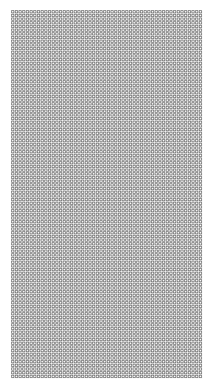

In [50]:
import matplotlib.pyplot as plt


# 12x12 matrix of RGB values set to white
def get_kernel(k_size=16):
    return np.full((k_size, k_size, 3), 255, dtype=np.uint8)


def get_square(x, y, size, color, k_size=16):
    kernel = get_kernel(k_size)
    kernel[x:x+size, y:y+size] = color
    kernel[x+1:x+size-1, y+1:y+size-1] = basic_colors['white']
    return kernel


def overlay(base, over):
    non_white_mask = ~np.all(over == [255, 255, 255], axis=-1)
    base[non_white_mask] = over[non_white_mask]
    return base


def get_journey(color):
    journey = get_square(0, 0, 6, darken_rgb(color), k_size=6)
    journey[1:6, 1:6] = color
    return journey


def count_journeys(cell):
    crop = cell[7:9, 7:9]
    crop = crop.reshape(-1, 3)
    pixels_strings = [','.join(map(str, pixel)) for pixel in crop]
    unique_pixels = list(set(pixels_strings))
    length = len(unique_pixels)
    return 0 if length == 1 and unique_pixels[0] == '255,255,255' else length


def add_journey(cell, color):
    count = count_journeys(cell)
    if count == 0:
        cell[5:11, 5:11] = get_journey(color)
    elif count == 1:
        cell[8:11, 5:11] = get_journey(color)[3:6, 0:6]
    elif count == 2:
        cell[5:8, 8:11] = get_journey(color)[0:3, 3:6]
    elif count == 3:
        cell[8:11, 8:11] = get_journey(color)[3:6, 3:6]
    return cell


def add_event(cell, color):
    cell = overlay(cell, get_square(3, 3, 11, darken_rgb(color)))
    cell = overlay(cell, get_square(2, 2, 11, color))
    return cell


def get_week():
    week = get_kernel()
    week = overlay(week, get_square(5, 5, 8, basic_colors['gray']))
    week = overlay(week, get_square(4, 4, 8, basic_colors['black']))
    return week


def get_year():
    return np.full((16, (52*16 - 51*5), 3), 255, dtype=np.uint8)


def get_life(length=100):
    return np.full(((length*16 - (length-1)*5), (52*16 - 51*5), 3), 255, dtype=np.uint8)

def add_week(year, week, week_number):
    full_weel = get_year()
    start = (week_number-1)*11
    full_weel[:, start:start+16] = week
    year = overlay(year, full_weel)
    return year


def add_year(life, year, year_number):
    full_year = get_life(life.shape[0] // 11)
    start = (year_number)*11
    full_year[start:start+16, :] = year
    life = overlay(life, full_year)
    return life


life = get_life(100)
year = get_year()

# week1 = get_week()
# week1 = add_event(week1, basic_colors['green'])
# week1 = add_journey(week1, basic_colors['brown'])
# week1 = add_journey(week1, basic_colors['red'])
# week1 = add_journey(week1, basic_colors['yellow'])
# week1 = add_journey(week1, basic_colors['cyan'])


for i in range(1, 53):
    year = add_week(year, get_week(), i)


for i in range(0, 100):
    life = add_year(life, year, i)


plt.imshow(life)
plt.axis('off')
plt.show()


life = np.kron(life, np.ones((10,10,1), dtype=np.uint8))
plt.imsave('life.png', life)



In [7]:
get_week_number(1998, 2, 17)

8